# Exercise 1
For this exercise, an analysis of "California housing prices" (https://www.kaggle.com/camnugent/california-housing-prices), will be taken.

### Qa)
Plot the distribution of median_income. Also, find the spread, average and median.



In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats import norm
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing

readFile = pd.read_csv('housing.csv')


# print(readFile.dtypes)
# Apparently, this worked :s
print(readFile.median_income)

def varians(data):
    return np.var(data)

#Spread

def spread(data):
    return np.sqrt(varians(data))

#Average

def Average(data):
    return sum(data)/len(data)

#Median

def median(data):
    return np.median(data)

def printAnalysis(data):
    print('Varians found to be = ', varians(data))
    print('Spread found to be = ', spread(data))
    print('Average found to be = ', Average(data))
    print('Median found to be = ', median(data))

# print(len(readFile))


0        8.3252
1        8.3014
2        7.2574
3        5.6431
4        3.8462
5        4.0368
6        3.6591
7        3.1200
8        2.0804
9        3.6912
10       3.2031
11       3.2705
12       3.0750
13       2.6736
14       1.9167
15       2.1250
16       2.7750
17       2.1202
18       1.9911
19       2.6033
20       1.3578
21       1.7135
22       1.7250
23       2.1806
24       2.6000
25       2.4038
26       2.4597
27       1.8080
28       1.6424
29       1.6875
          ...  
20610    1.3631
20611    1.2857
20612    1.4934
20613    1.4958
20614    2.4695
20615    2.3598
20616    2.0469
20617    3.3021
20618    2.2500
20619    2.7303
20620    4.5625
20621    2.3661
20622    2.4167
20623    2.8235
20624    3.0739
20625    4.1250
20626    2.1667
20627    3.0000
20628    2.5952
20629    2.0943
20630    3.5673
20631    3.5179
20632    3.1250
20633    2.5495
20634    3.7125
20635    1.5603
20636    2.5568
20637    1.7000
20638    1.8672
20639    2.3886
Name: median_income, Len

In [2]:
printAnalysis(readFile.median_income)

Varians found to be =  3.60914768969746
Spread found to be =  1.899775694574878
Average found to be =  3.8706710029070246
Median found to be =  3.5347999999999997


### Qb)
Is there a difference in median and average of median_income?
Which of these two describes best the average family income and why?


In [3]:
ab8=0

for x in range(len(readFile.median_income)):
    if readFile.median_income.loc[x]>8:
        ab8 +=1
    
print('Household with income above 8=', ab8)


ab7=0
for y in range(len(readFile.median_income)):
    if readFile.median_income.loc[y]>7:
        ab7 +=1
    
print('Household with income above 7=', ab7)

bl12=0
for y in range(len(readFile.median_income)):
    if readFile.median_income.loc[y]>12:
        bl12 +=1
    
print('Household with income above 12=', bl12)


bl3=0

for x in range(len(readFile.median_income)):
    if readFile.median_income.loc[x]<3.8:
        bl3 +=1
    
print('Household with income below 3.8=', bl3)


bl2=0
for y in range(len(readFile.median_income)):
    if readFile.median_income.loc[y]<3.5:
        bl2 +=1
    
print('Household with income below 3.5=', bl2)



Household with income above 8= 690
Household with income above 7= 1199
Household with income above 12= 113
Household with income below 3.8= 11716
Household with income below 3.5= 10093


### Qb answer
There is a difference in the median and average of median_income.

Median describes: Median household income refers to the income level earned by a given household where half of the households in the geographic area of interest earn more and half earn less.  The median is found by listing the income in ascending or descending order and finding the value given to half of the number of house holds.

Average/mean describes: the average household income on the other hand is calculated by dividing the total household income in the target geography by the number of households.


The median compared to the average disregards skewed datapoints and outliers. For a given demographic with maybe 15% unknown distribution, the median would be a better fit.
If everyone for given demographic was having about the same income, the average would describe the average family income better. 


As seen, more than half of the total households earns less than the mean of the median_income, compared to the median which seems close to the half of the total households

### Qc)
Fit a normal distribution of the data and plot a histogram - does the two fit?


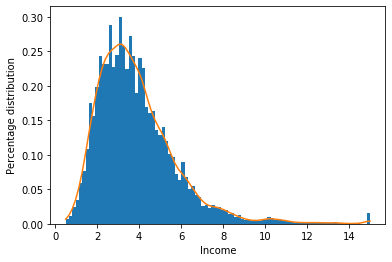

In [4]:
#density line
density = stats.gaussian_kde(readFile.median_income)



normRead=np.random.normal(Average(readFile.median_income), spread(readFile.median_income), len(readFile.median_income))
samples, histo, _ = plt.hist(readFile.median_income, bins='fd', density=True)
plt.plot(histo, density(histo))
plt.xlabel('Income')
plt.ylabel('Percentage distribution')
plt.show()

### Qd)
Is there a link between median_house_value and median_income? Make correlation plot



In [5]:
readFile.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Text(0, 0.5, 'House Value')

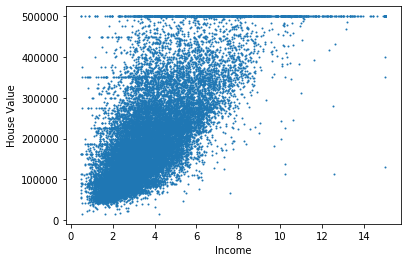

In [6]:
plt.scatter(readFile.median_income, readFile.median_house_value, s=1)
plt.xlabel('Income')
plt.ylabel('House Value')

In [7]:
#500k house values can be liabilities. Houses could have a higher value and may have moved down to 500k.
#Try to remove house values at 500k

Below500k = []
NewIncome = []
for x in range(len(readFile.median_house_value)):
    if readFile.median_house_value.loc[x]<500000:
        Below500k.append(readFile.median_house_value.loc[x])
        NewIncome.append(readFile.median_income.loc[x])

        
# print(len(Below500k))
# print(len(NewIncome))




Text(0, 0.5, 'House Value')

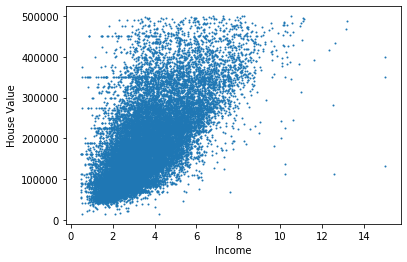

In [8]:
plt.scatter(NewIncome, Below500k, s=1)
plt.xlabel('Income')
plt.ylabel('House Value')

### Qe)
What is the 5% and 95% percentages of median_house_value? (i.e. the limits for 5% lowest and highest). Also, plot the distribution of median_house_value.
Comment on the realism of the max-value and 95% percentile - suggest a solution for this issue, if more realistic data was desired





In [9]:
MeanHouse = np.mean(readFile.median_house_value)
SDHouse = np.std(readFile.median_house_value)
MedHouse = np.median(readFile.median_house_value)

print('The Average of house value = ', MeanHouse)
print('\nThe standard deviation of house value = ', SDHouse)
print('\nThe median of house value = ',MedHouse)

The Average of house value =  206855.81690891474

The standard deviation of house value =  115392.82040412186

The median of house value =  179700.0


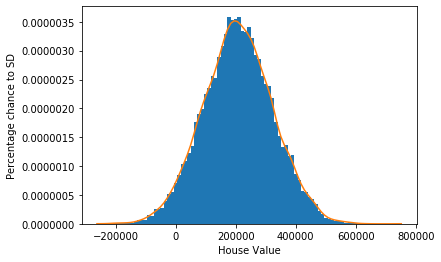

In [10]:
Distribution = np.random.normal(MeanHouse, SDHouse, len(readFile.median_house_value))
#density line
density = stats.gaussian_kde(Distribution)


samples, histo, _ = plt.hist(Distribution, bins='fd', density=True)

plt.plot(histo, density(histo))
plt.xlabel('House Value')
plt.ylabel('Percentage chance to SD')
plt.show()



In [11]:
Percent95 = np.percentile(histo, 95)
print(Percent95)
Percent5 = np.percentile(histo, 5)
print(Percent5)


701097.5689354688
-211288.88494097773


### Conclusion

In this exercise we've worked with data of Californian households and the income of the people living in them.
When looking at the income below and above the median value, it shows that a lot more people has an income below the median.
This is more visible in the histogram made in Qd.

A correlation between the household value and the income was made. Most data was plottet as expected, which means there was a lot of data below the median and lesser data above.
In the first correlation, there is a heavy amount of data forming a line in the top. A reason for this could be, that the data above 500000 isn't shown or the data is capped at 500000.

We chose to remove all data above 500000, since it did more harm than good to have it included.
This gives a better correlation diagram. There is still shown lines of heavy data, but this could be the Californian price market, having a great sale with these specific values.

In Qe the Max value isn't realistic with the results, since the pricing is above 500000.
A possible solution would be, to make a cap for the max value, so it wouldn't get above 500000. After setting a cap, the data above 500000 should be removed from the dataset.